In [7]:
import tensorboard as tb
from matplotlib import pyplot as plt
from dl_framework.experiment_data import experiment_data
import numpy as np

In [88]:
vww_10_data = experiment_data('tb_data/staging/fed_vww_255ed/')
vww_2_data = experiment_data('tb_data/federated/fl_vww_successful/')

In [197]:
cifar_10_data = experiment_data('tb_data/cifar_many_nodes/fed_ic_fcd86/')
cifar_2_data = experiment_data('tb_data/federated/fl_cifar_successful/')

In [149]:
ad_10_data = experiment_data('tb_data/ad_tennodes/fed_ad_4a7d8/')
ad_2_data = experiment_data('tb_data/ad_federated/fed_ad_success/')

In [198]:

def getmeanstd_of_vww_data(experiment_data):

    trainacc_value_list = [] 
    testacc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'trainacc' in key:
            trainacc_value_list.append(tb_plot.value)
            steps = tb_plot.step

        if 'testacc' in key:
            testacc_value_list.append(tb_plot.value)

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)

    trainacc_value_list = np.array(trainacc_value_list)
    testacc_value_list = np.array(testacc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_trainacc = [trainacc_value_list.mean(axis=0),trainacc_value_list.std(axis=0)] 
    meanstd_testacc = [testacc_value_list.mean(axis=0),testacc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_trainacc,meanstd_testacc,meanstd_loss,steps

meanstd_vww10 = getmeanstd_of_vww_data(vww_100_data)
meanstd_vww2 = getmeanstd_of_vww_data(vww_10_data)
meanstd_cifar10 = getmeanstd_of_vww_data(cifar_10_data)
meanstd_cifar2 = getmeanstd_of_vww_data(cifar_2_data)
meanstd_ks10 = getmeanstd_of_vww_data(ks_10_data)
meanstd_ks2 = getmeanstd_of_vww_data(ks_2_data)

In [180]:
ad_steps = None

def getmeanstd_of_ad_data(experiment_data):
    auc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'auc' in key:
            if len(key) != 15:
                continue
            print(f'{key}:{tb_plot.value.shape}')
            auc_value_list.append(tb_plot.value[:90])
            ad_steps = tb_plot.step[:90]

        if 'loss' in key:
            loss_value_list.append(tb_plot.value[:90])

    auc_value_list = np.array(auc_value_list,dtype=float)
    loss_value_list = np.array(loss_value_list,dtype=float)

    meanstd_auc = [auc_value_list.mean(axis=0),auc_value_list.std(axis=0)]  
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_auc,meanstd_loss,ad_steps

meanstd_ad10 = getmeanstd_of_ad_data(ad_10_data)
meanstd_ad2 = getmeanstd_of_ad_data(ad_2_data)


data/node_6/auc:(100,)
data/node_7/auc:(100,)
data/node_4/auc:(100,)
data/node_3/auc:(100,)
data/node_9/auc:(93,)
data/node_8/auc:(100,)
data/node_2/auc:(100,)
data/node_1/auc:(90,)
data/node_5/auc:(100,)
data/node_0/auc:(90,)
data/node_1/auc:(100,)
data/node_0/auc:(100,)


In [81]:
# Calculate mean and std

def get_std_interval(mean,std):
    return mean+std,mean-std


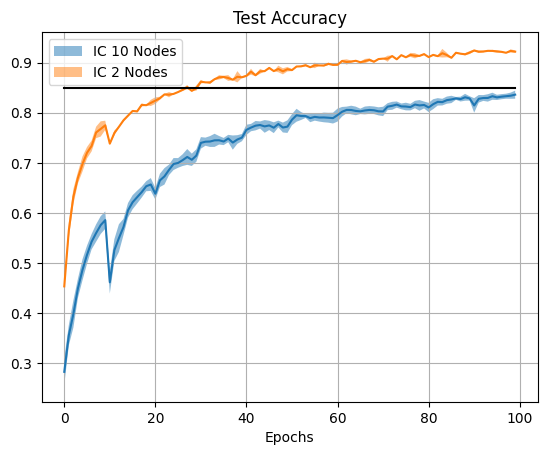

In [201]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.5,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

steps = meanstd_cifar10[-1]
plot_withci(meanstd_cifar10[1],name='IC 10 Nodes',steps=steps)
plot_withci(meanstd_cifar2[1],name='IC 2 Nodes',steps=steps)
plt.title('Test Accuracy')
plt.legend()
plt.grid('both')
plt.plot(steps,[0.85]*len(steps),c='black')

In [172]:
print(ad_steps)

None


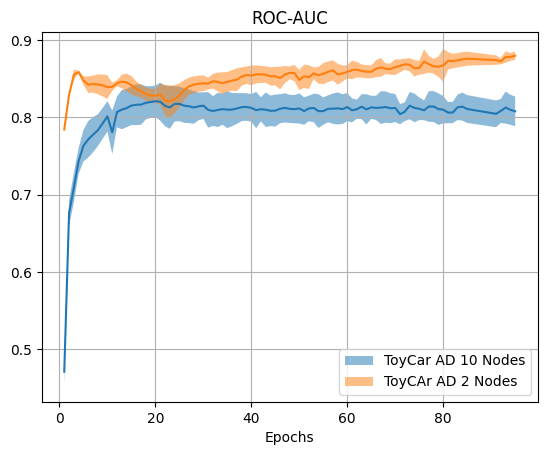

In [183]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.5,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

plot_withci(meanstd_ad10[0],name='ToyCar AD 10 Nodes',steps=meanstd_ad10[2])
plot_withci(meanstd_ad2[0],name='ToyCAr AD 2 Nodes',steps=meanstd_ad10[2])
plt.title('ROC-AUC')
plt.legend()
plt.grid()